In [1]:
import datetime
import numpy as np
import pandas as pd
from yahoo_finance_api import YahooFinance as yf
import matplotlib.pyplot as plt
%matplotlib notebook

### Load TCS Data for past 1 year

In [2]:
stock_symbol = 'TCS.NS'

my_stock = pd.DataFrame()

my_stock = yf(ticker = stock_symbol, 
                       result_range='1y',
                       interval = '1d',
                       dropna = True).result[['Open', 'High', 'Low', 'Close']]

print('Shape of the dataframe: ', my_stock.shape)

my_stock.head()

Shape of the dataframe:  (250, 4)


/home/arjun/anaconda3/lib/python3.7/site-packages/yahoo_finance_api-0.0.1-py3.7.egg/yahoo_finance_api/__init__.py:73: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


,Open,High,Low,Close
2019-10-16 09:15:00,2038.0,2056.00,2016.00,2046.40
2019-10-17 09:15:00,2014.0,2038.00,1999.30,2030.95
2019-10-18 09:15:00,2037.5,2063.90,2025.00,2057.35
2019-10-22 09:15:00,2080.0,2111.50,2040.05,2051.40
2019-10-23 09:15:00,2060.0,2083.85,2052.50,2070.10


In [3]:
my_stock.index = pd.DatetimeIndex(data = my_stock.index)
my_stock.index

DatetimeIndex(['2019-10-16 09:15:00', '2019-10-17 09:15:00',
               '2019-10-18 09:15:00', '2019-10-22 09:15:00',
               '2019-10-23 09:15:00', '2019-10-24 09:15:00',
               '2019-10-25 09:00:00', '2019-10-29 09:15:00',
               '2019-10-30 09:15:00', '2019-10-31 09:15:00',
               ...
               '2020-10-05 09:15:00', '2020-10-06 09:15:00',
               '2020-10-07 09:15:00', '2020-10-08 09:15:00',
               '2020-10-09 09:15:00', '2020-10-12 09:15:00',
               '2020-10-13 09:15:00', '2020-10-14 09:15:00',
               '2020-10-15 09:15:00', '2020-10-16 13:16:11'],
              dtype='datetime64[ns]', length=250, freq=None)

* remove the last row, since that is live price

In [4]:
stock_close_copy = my_stock.iloc[:-1,:].copy()
stock_close_copy.index

DatetimeIndex(['2019-10-16 09:15:00', '2019-10-17 09:15:00',
               '2019-10-18 09:15:00', '2019-10-22 09:15:00',
               '2019-10-23 09:15:00', '2019-10-24 09:15:00',
               '2019-10-25 09:00:00', '2019-10-29 09:15:00',
               '2019-10-30 09:15:00', '2019-10-31 09:15:00',
               ...
               '2020-10-01 09:15:00', '2020-10-05 09:15:00',
               '2020-10-06 09:15:00', '2020-10-07 09:15:00',
               '2020-10-08 09:15:00', '2020-10-09 09:15:00',
               '2020-10-12 09:15:00', '2020-10-13 09:15:00',
               '2020-10-14 09:15:00', '2020-10-15 09:15:00'],
              dtype='datetime64[ns]', length=249, freq=None)

### Calculation of Quartiles

In [5]:
sample_size = 30
col = stock_close_copy['Close'].shift(1)
col = stock_close_copy['Open']
stock_close_copy['OC'] = (stock_close_copy['Close'] - col)/col

stock_close_copy['Q0'] = col * ( 1 + stock_close_copy['OC'].shift(1).rolling(sample_size).quantile(0.0))
stock_close_copy['Q1'] = col * ( 1 + stock_close_copy['OC'].shift(1).rolling(sample_size).quantile(0.25))
stock_close_copy['Q2'] = col * ( 1 + stock_close_copy['OC'].shift(1).rolling(sample_size).quantile(0.5))
stock_close_copy['Q3'] = col * ( 1 + stock_close_copy['OC'].shift(1).rolling(sample_size).quantile(0.75))
stock_close_copy['Q4'] = col * ( 1 + stock_close_copy['OC'].shift(1).rolling(sample_size).quantile(1.0))
stock_close_copy = stock_close_copy.dropna().reset_index(drop = True)
stock_close_copy

,Open,High,Low,Close,OC,Q0,Q1,Q2,Q3,Q4
0,2060.0,2067.70,2016.00,2021.05,-0.018908,2002.585689,2035.260369,2060.166000,2070.223653,2131.223663
1,2027.7,2062.00,2010.00,2051.00,0.011491,1971.185923,2000.673367,2021.427345,2037.763350,2097.806903
2,2053.0,2082.00,2045.50,2078.50,0.012421,1995.780786,2025.636151,2046.649080,2063.188912,2123.981640
3,2083.0,2126.80,2068.35,2121.30,0.018387,2024.944655,2055.236289,2076.556275,2093.337800,2155.018878
4,2124.0,2128.00,2101.00,2123.60,-0.000188,2064.801943,2098.491759,2124.171157,2140.558145,2197.436436
...,...,...,...,...,...,...,...,...,...,...
214,2810.0,2829.85,2780.00,2812.95,0.001050,2674.947959,2789.866976,2819.230784,2845.718780,2936.468269
215,2815.5,2854.00,2800.75,2830.00,0.005150,2680.183622,2802.090702,2824.748851,2851.288692,2942.215805
216,2845.0,2854.90,2812.20,2826.55,-0.006485,2708.265816,2839.119329,2859.785723,2881.163676,2973.043496
217,2842.0,2842.00,2787.55,2809.60,-0.011400,2705.410000,2828.464491,2851.202248,2878.125542,2969.908477


### plot the histogram

<IPython.core.display.Javascript object>


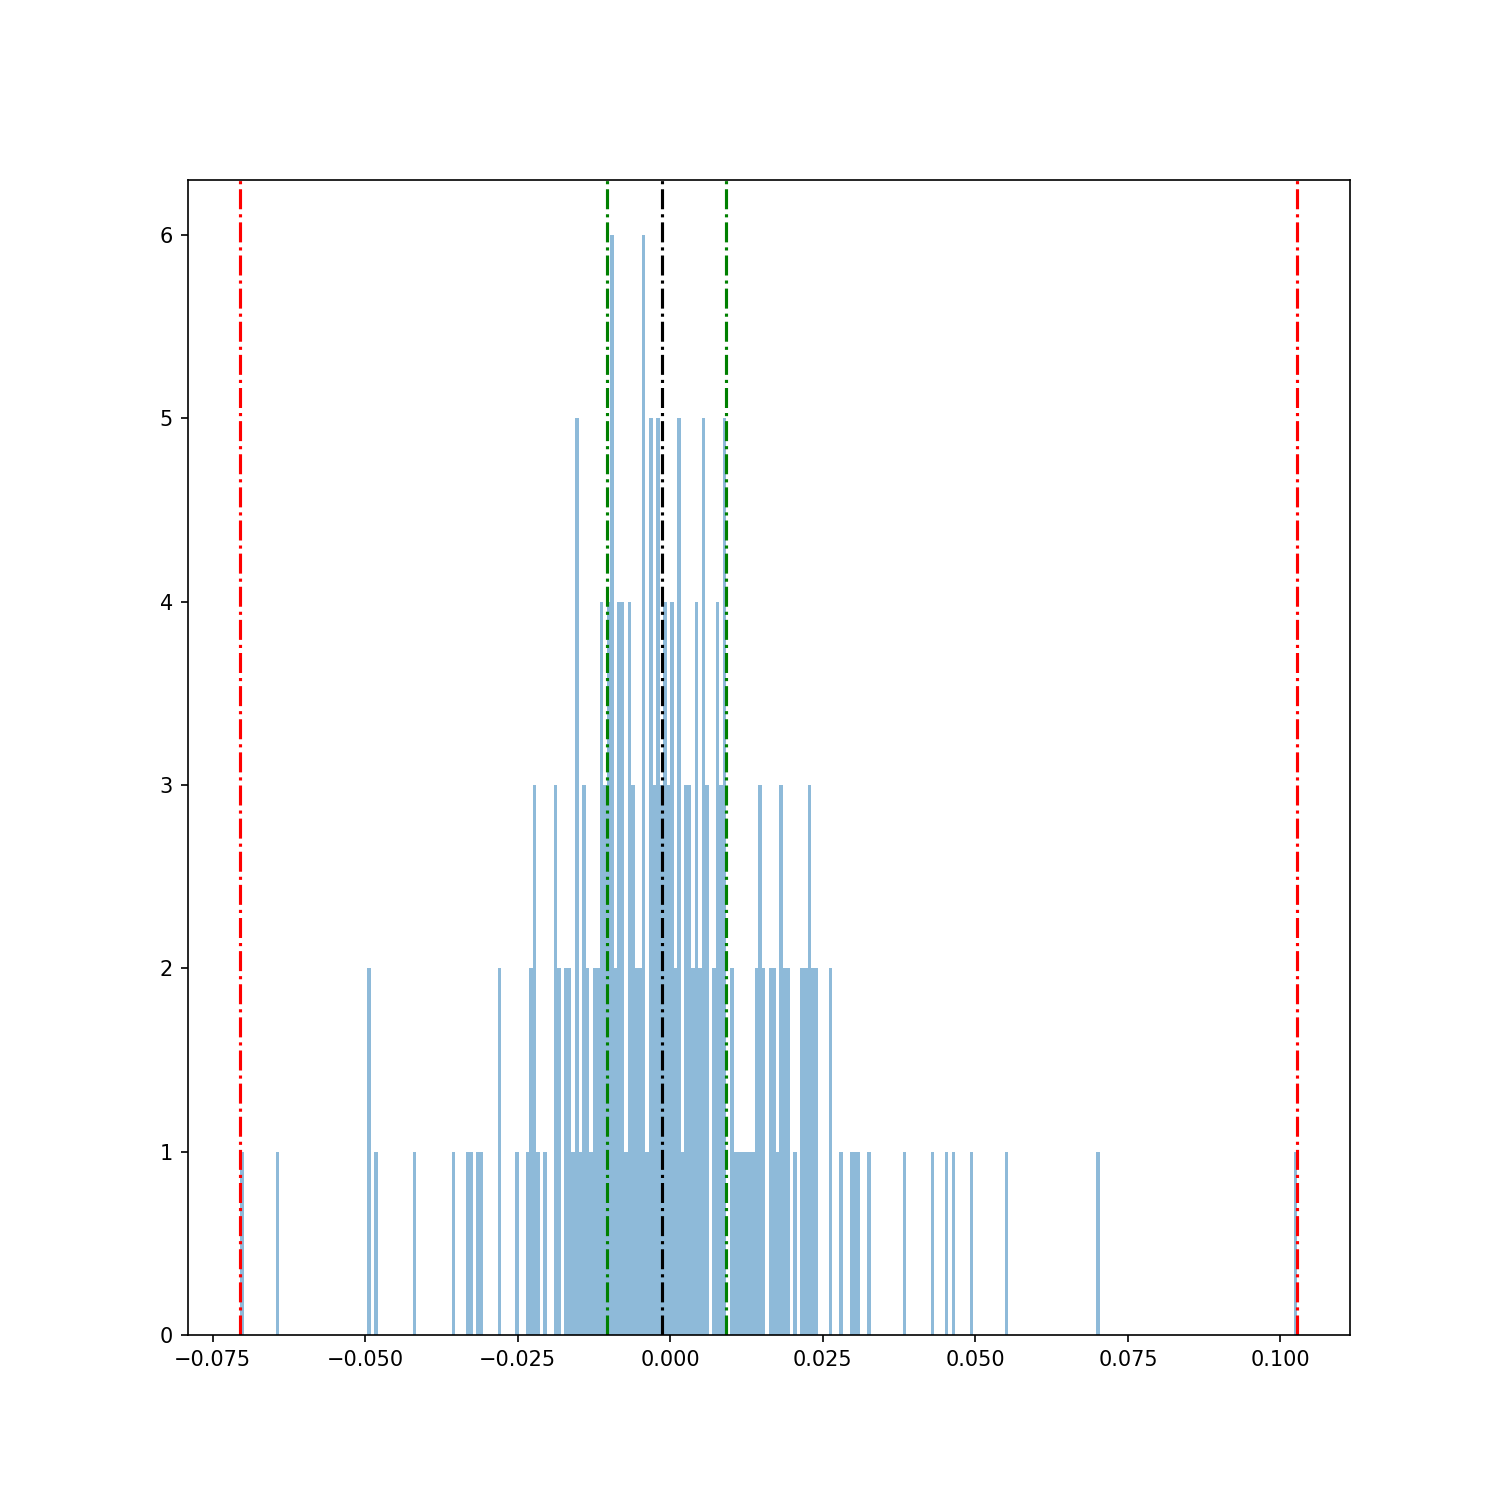

Median : -0.0013578624616731971
Q3 - Q4:  0.0935733450185139
Q1 - Q0:  0.06010407083904476


In [6]:
plt.figure(figsize = (10,10))
plt.hist(stock_close_copy['OC'], bins = 300, alpha = 0.5)
plt.axvline(stock_close_copy['OC'].quantile(0.0), ls = '-.', color = 'r')
plt.axvline(stock_close_copy['OC'].quantile(0.25), ls = '-.', color = 'g')
plt.axvline(stock_close_copy['OC'].quantile(0.5), ls = '-.', color = '#000000')
plt.axvline(stock_close_copy['OC'].quantile(0.75), ls = '-.', color = 'g')
plt.axvline(stock_close_copy['OC'].quantile(1.0), ls = '-.', color = 'r')
plt.show()
print('Median :', stock_close_copy['OC'].median())
print('Q3 - Q4: ', stock_close_copy['OC'].quantile(q = 1.0) - stock_close_copy['OC'].quantile(q = 0.75))
print('Q1 - Q0: ', stock_close_copy['OC'].quantile(q = 0.25) - stock_close_copy['OC'].quantile(q = 0.0))

### Plot the range with quartiles

<IPython.core.display.Javascript object>


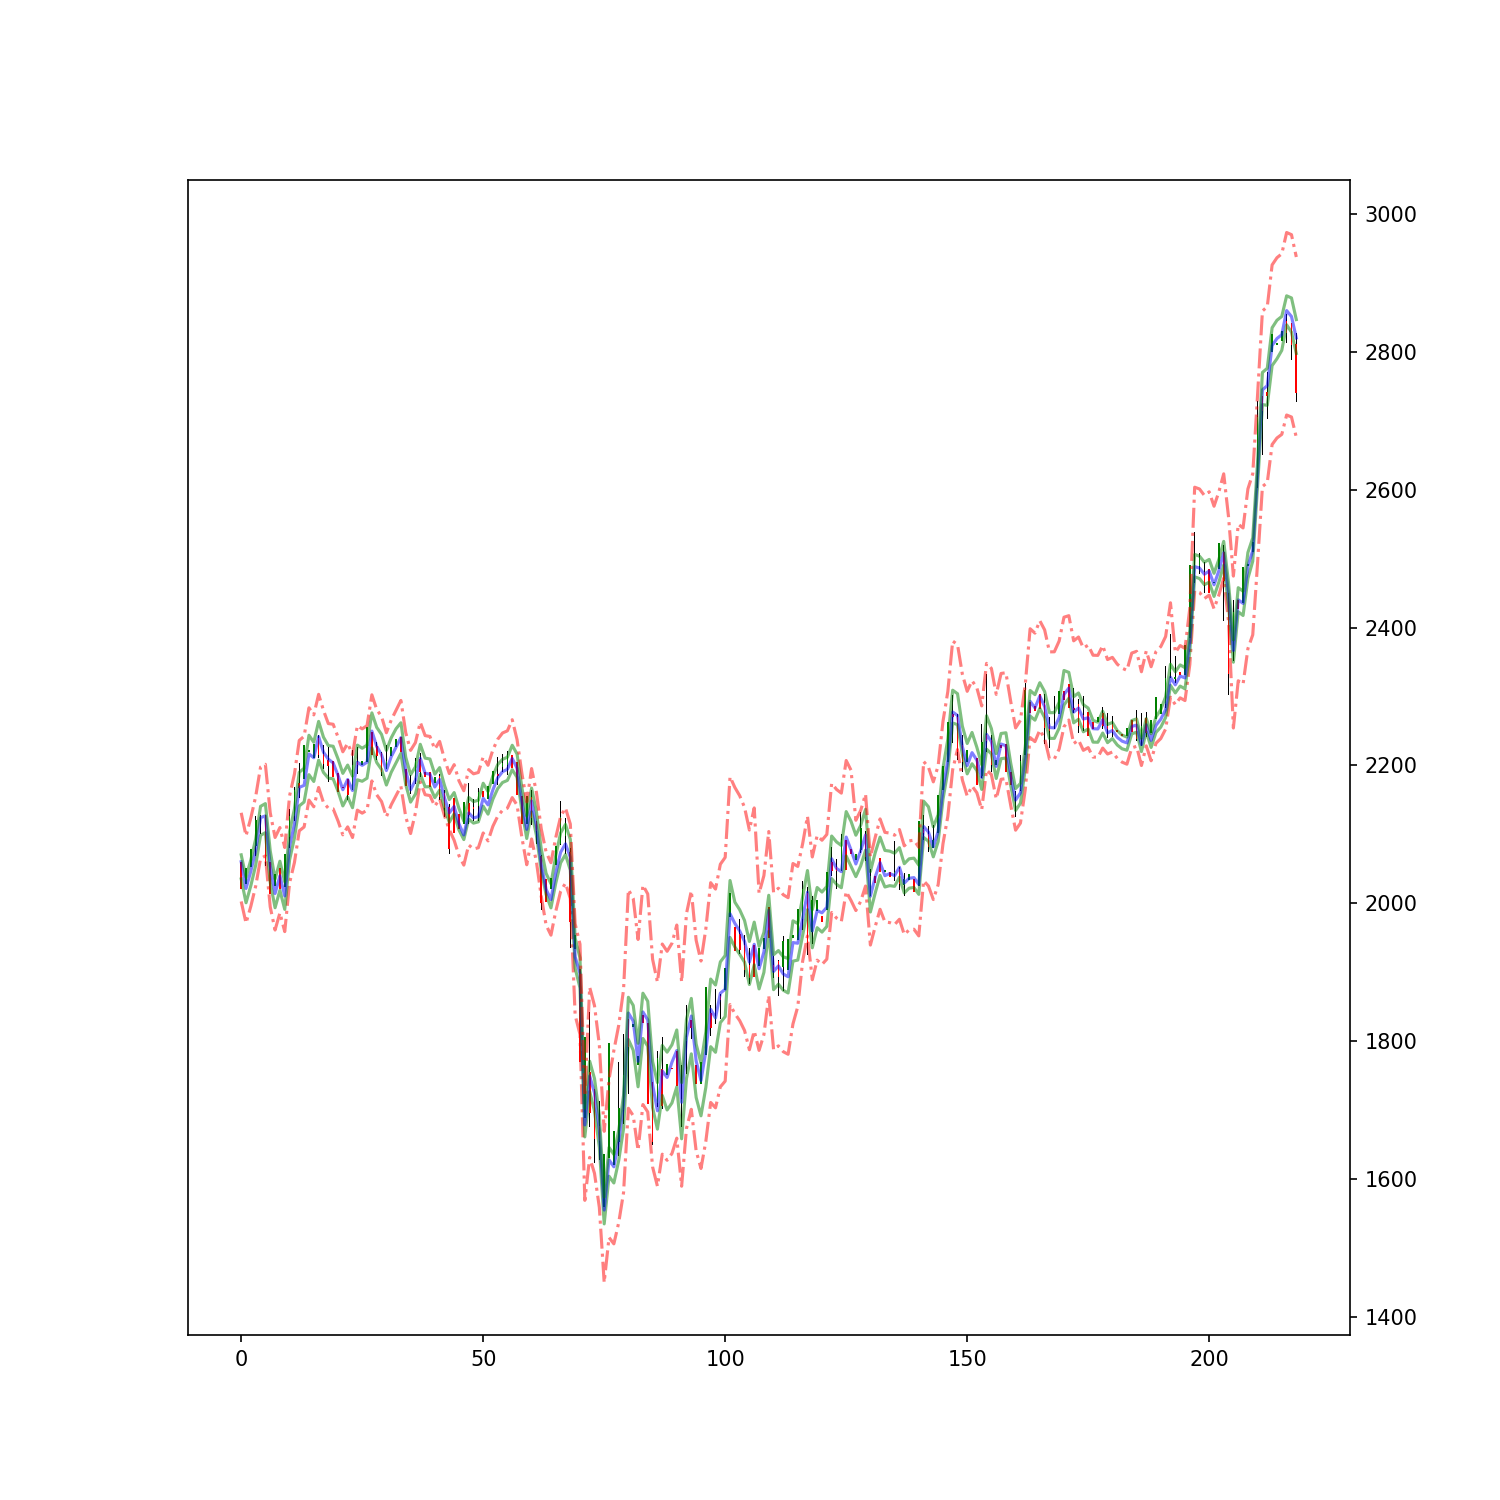

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))
stock_close_copy['Up'] = stock_close_copy['Close'] > stock_close_copy['Open']
stock_close_copy['Bottom'] = np.where(stock_close_copy['Up'], stock_close_copy['Open'], stock_close_copy['Close'])
stock_close_copy['Bar'] = stock_close_copy['High'] - stock_close_copy['Low']
stock_close_copy['Body'] = abs(stock_close_copy['Close'] - stock_close_copy['Open'])
stock_close_copy['Color'] = np.where(stock_close_copy['Up'], 'g', 'r')
ax.yaxis.tick_right()
ax.bar(stock_close_copy.index, 
       bottom = stock_close_copy['Low'], 
       height = stock_close_copy['Bar'],
       width = 0.1,
       color = '#000000')
ax.bar(stock_close_copy.index, 
       bottom = stock_close_copy['Bottom'], 
       height = stock_close_copy['Body'],
       width = 0.35,
       color = stock_close_copy['Color'])

t = 0.5
ax.plot(stock_close_copy['Q0'], color = 'r', ls = '-.', alpha = t)
ax.plot(stock_close_copy['Q1'], color = 'g', alpha = t)
ax.plot(stock_close_copy['Q2'], color = 'b', alpha = t)
ax.plot(stock_close_copy['Q3'], color = 'g', alpha = t)
ax.plot(stock_close_copy['Q4'], color = 'r', ls = '-.', alpha = t)
plt.show()

### Percentage of points within Inter quartile range

In [8]:
# inter quartile range
db = stock_close_copy[(stock_close_copy['Close'] >= stock_close_copy['Q1']) & (stock_close_copy['Close'] <= stock_close_copy['Q3'])]
inter_quartile_percentage = len(db) / len(stock_close_copy) * 100
print('Percentage of points in Inter quartile range: {}% '.format(round(inter_quartile_percentage),2))

Percentage of points in Inter quartile range: 48% 


### Forecasting the Inter-quartile range for today based on past date

In [9]:
# forecasting
open_price_today = 2750.10
q1 = (open_price_today * (1 + stock_close_copy['OC'].rolling(sample_size).quantile(0.25))).iloc[-1]
q3 = (open_price_today * (1 + stock_close_copy['OC'].rolling(sample_size).quantile(0.75))).iloc[-1]
iqr = q3 - q1
iqr_range = iqr / open_price_today * 100
print('IQR is between {} and {}, IQR: {}, Range of IQR: {}%'.format(q1, 
                                                                    q3,
                                                                    iqr,
                                                                    round(iqr_range, 2)))

IQR is between 2732.8637904416005 and 2785.057372321429, IQR: 52.19358187982834, Range of IQR: 1.9%
